In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


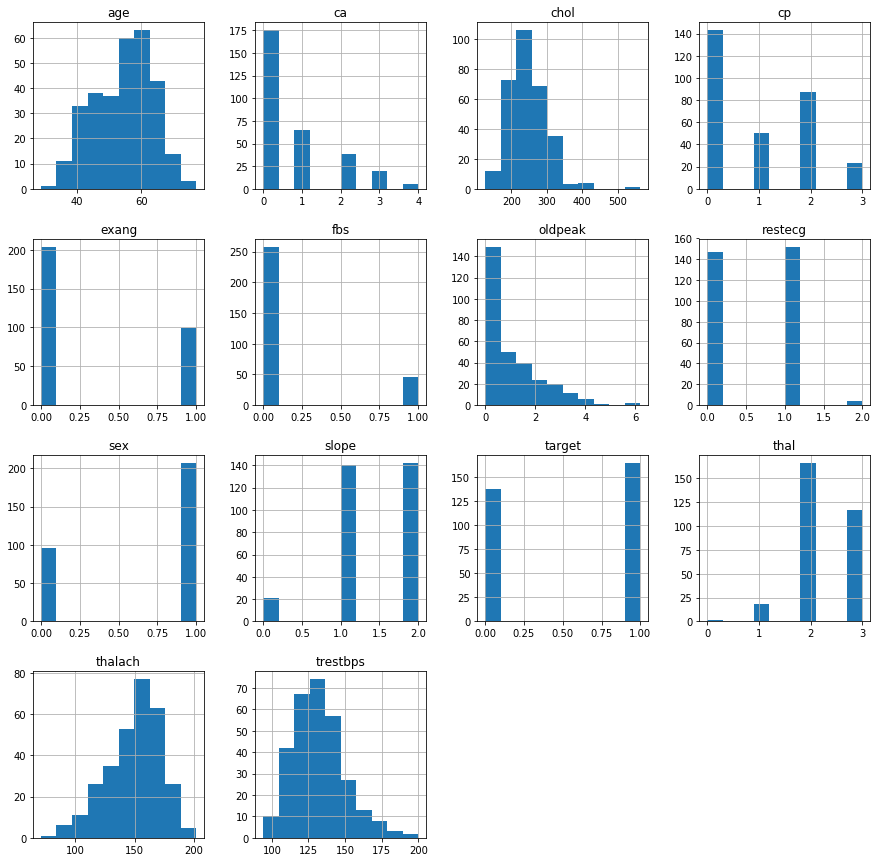

In [6]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**As the coulmn cp (chest pain) has missing values, we need to impute the data**

*The data is numeric and hence mean stratergy will be a suitable choice.*

In [8]:
from sklearn.impute import SimpleImputer
imput = Imputer(missing_values='NaN',strategy='mean')
df = list(imput.fit_transform(df))

for i in range(303):
    for j in range(14):
        df[i][j] = math.ceil(df[i][j])

NameError: name 'Imputer' is not defined

In [9]:
df = pd.DataFrame(df)

In [10]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',6: 'restecg',7: 'thalach',8: 'exang',9: 'oldpeak',10: 'slope',11: 'ca',12: 'thal',13:'target'})

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
x = df.iloc[:,:-1]

In [13]:
y = df.iloc[:,-1]

In [14]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

cp          0.129161
oldpeak     0.117608
thal        0.112903
thalach     0.104084
ca          0.097922
age         0.088389
chol        0.081758
trestbps    0.076915
exang       0.067250
slope       0.055348
sex         0.037139
restecg     0.021520
fbs         0.010004
dtype: float64

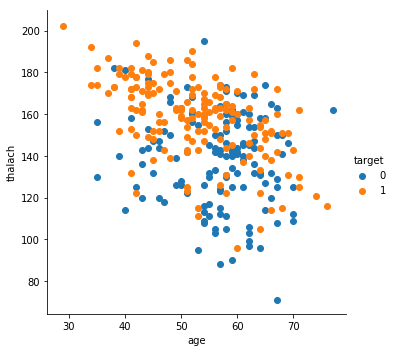

In [15]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "age", "thalach") \
   .add_legend()
plt.show()

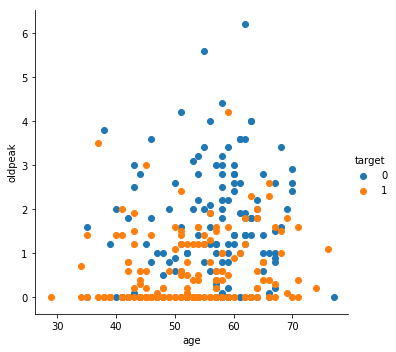

In [16]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "age", "oldpeak") \
   .add_legend()
plt.show()

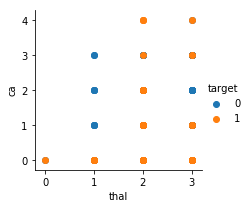

In [17]:
sns.FacetGrid(df, hue="target", height=3) \
   .map(plt.scatter, "thal", "ca") \
   .add_legend()
plt.show()

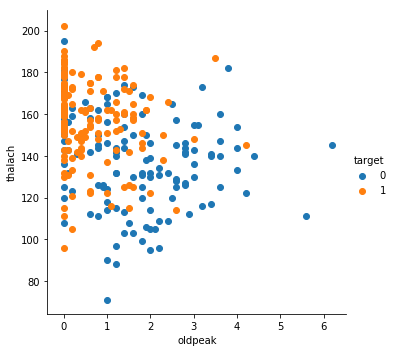

In [18]:
sns.FacetGrid(df, hue="target", height=5) \
   .map(plt.scatter, "oldpeak", "thalach") \
   .add_legend()
plt.show()

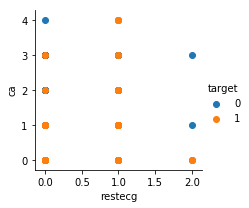

In [19]:
sns.FacetGrid(df, hue="target", height=3) \
   .map(plt.scatter, "restecg", "ca") \
   .add_legend()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [21]:
number=[0,1,2]
for col in df.itertuples():

    if col.cp in number:
        df['cp'].replace(to_replace=col.cp, value=1, inplace=True)

** Testing the accuracy when the top 8 features are used for fitting**

In [22]:
df_top8 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(df_top8,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.8026315789473685


Confusion Matrix:  [[27  9]
 [ 6 34]]


Precision:  [0.81818182 0.79069767]
Recall:     [0.75 0.85]
Fscore:     [0.7826087  0.81927711]
Support:    [36 40]


**Maybe, Standardization could help ?**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
x = df.iloc[:,:-1]
x_std = StandardScaler().fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy: ',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

Accuracy:  0.8289473684210527


Confusion Matrix:  [[26  6]
 [ 7 37]]


Precision:  [0.78787879 0.86046512]
Recall:     [0.8125     0.84090909]
Fscore:     [0.8        0.85057471]
Support:    [32 44]


**Accuracy with different test sizes**

In [27]:
testSize = [0.5,0.4,0.3,0.25,0.2,0.15,0.1]

acc = []
for i in testSize:
    x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=i)
    clf = AdaBoostClassifier()
    clf.fit(x_train,y_train)
    prediction=clf.predict(x_test)
    acc.append(accuracy_score(prediction,y_test))

models_dataframe=pd.DataFrame(acc,index=testSize)   
models_dataframe

,0
0.50,0.750000
0.40,0.778689
0.30,0.824176
0.25,0.828947
0.20,0.737705
0.15,0.869565
0.10,0.838710


**NOTE:
We can conclude that training size in the range 70% to 75% gives the optimal result, otherwise the data faces the issues of either under fitting or over fitting**